<a href="https://colab.research.google.com/github/samkamau81/KaggleX-BIPOC-Project/blob/main/KaggleX_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem**


---


SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.


There are 3 different datasets for both train and test.

* Demographic data (traindemographics.csv)
* Performance data (trainperf.csv) : This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict whether this loan would default given all previous loans and demographics of a customer.
* Previous loans data (trainprevloans.csv) : This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.




---



 

# **Approach**


This is a classification problem where our we are to predict where a customer falls into i.e whether he/she falls into approved for loan (1) or dissapproved to acquire a loan (0).

Some of the models in mind are ;
* Naive Bayes
* Decision Tree
* Logistic Regression
* KNN
* Artificial Neural network


---



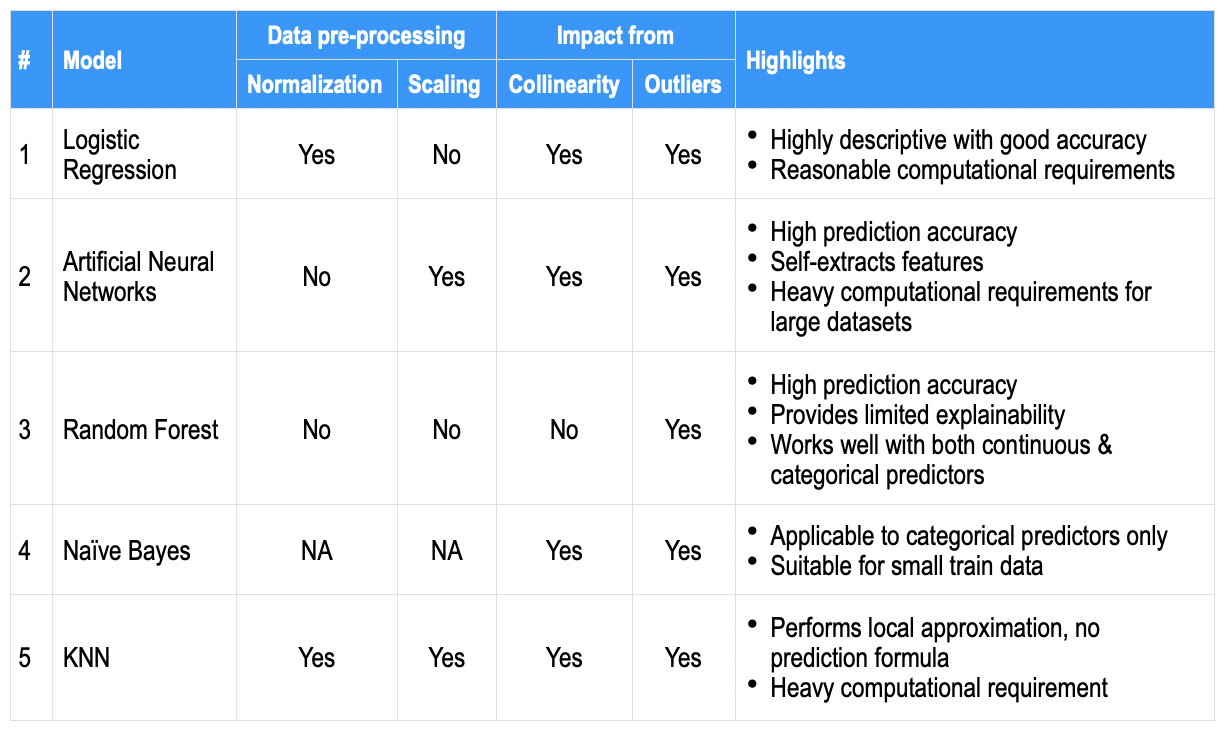


---
### Framework

* Scikit-Learn
* Tensorflow

---
### Process

* Data Preparation
* Exploratory Data Analysis
* Training Models
* Evaluating Models
* Retaining Models


# **Data Collection and Prep**

In [ ]:
import pandas as pd

In [ ]:
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/traindemographics.csv
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/trainperf.csv
#https://github.com/samkamau81/KaggleX-BIPOC-Project/blob/main/trainprevloans.csv
demographic_data=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/traindemographics.csv" ,index_col=0)
performance_data=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/trainperf.csv",index_col=0)
prev_loan_data=pd.read_csv("https://github.com/samkamau81/KaggleX-BIPOC-Project/raw/main/trainprevloans.csv",index_col=0)


# **Demographic Data**

In [ ]:
demographic_data.head(10)

,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
customerid,,,,,,,,
8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
8a858f045bc9690c015bca251e9a4e95,1978-12-11 00:00:00.000000,Savings,3.330087,6.552518,GT Bank,NaN,Permanent,NaN
8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN
8a858f275c451af5015c546a50ce55ed,1986-09-09 00:00:00.000000,Savings,4.734382,7.606868,GT Bank,NaN,Permanent,NaN
8a858f405d13c45f015d13dd93ec0c1c,1992-11-17 00:00:00.000000,Savings,3.290590,6.612075,EcoBank,NaN,Permanent,NaN


In [ ]:
demographic_data.columns

Index(['birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients'],
      dtype='object')

In [ ]:
demographic_data.shape

(4346, 8)

In [ ]:

demographic_data.describe()


,longitude_gps,latitude_gps
count,4346.000000,4346.000000
mean,4.626189,7.251356
std,7.184832,3.055052
min,-118.247009,-33.868818
25%,3.354953,6.470610
50%,3.593302,6.621888
75%,6.545220,7.425052
max,151.209290,71.228069


In [ ]:
demographic_data.dtypes

birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

In [ ]:
demographic_data.corr()

,longitude_gps,latitude_gps
longitude_gps,1.000000,-0.172954
latitude_gps,-0.172954,1.000000


# **Performance Data**

In [ ]:
performance_data.head(10)

,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
customerid,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
8a8589f35451855401546b0738c42524,301986516,8,2017-07-19 21:46:24.000000,2017-07-19 20:46:18.000000,30000.0,39000.0,60,NaN,Good
8a858e095c59b91b015c5e5cea3719bc,301972027,3,2017-07-10 19:25:33.000000,2017-07-10 18:25:28.000000,10000.0,13000.0,30,NaN,Good
8a858e1158dc4d830158f7bde4f47ea7,301994428,10,2017-07-24 23:42:27.000000,2017-07-24 22:42:21.000000,30000.0,34500.0,30,NaN,Good
8a858e185b4923b4015b4ae48d28646a,301996687,4,2017-07-26 10:53:05.000000,2017-07-26 09:52:57.000000,10000.0,11500.0,15,NaN,Good


In [ ]:
performance_data.columns

Index(['systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag'],
      dtype='object')

In [ ]:
performance_data.shape

(4368, 9)

In [ ]:
performance_data.dtypes

systemloanid       int64
loannumber         int64
approveddate      object
creationdate      object
loanamount       float64
totaldue         float64
termdays           int64
referredby        object
good_bad_flag     object
dtype: object

In [ ]:
performance_data.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,-0.046542,-0.057324,-0.061628,-0.065113
loannumber,-0.046542,1.000000,0.833318,0.815303,0.405131
loanamount,-0.057324,0.833318,1.000000,0.994392,0.558818
totaldue,-0.061628,0.815303,0.994392,1.000000,0.627599
termdays,-0.065113,0.405131,0.558818,0.627599,1.000000


# **Previous Loan Data**

In [ ]:
prev_loan_data.head(10)

,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
customerid,,,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,NaN,2017-04-05 00:00:00.000000,2017-04-04 15:31:47.000000
8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,NaN,2017-07-04 00:00:00.000000,2017-07-03 23:25:29.000000
8a8589f35451855401546b0738c42524,301912443,6,2017-05-18 09:42:18.000000,2017-05-18 08:41:12.000000,20000.0,24500.0,30,2017-06-19 10:10:35.000000,NaN,2017-06-19 00:00:00.000000,2017-06-19 10:00:21.000000
8a858e095c59b91b015c5e5cea3719bc,301936857,2,2017-06-13 08:26:31.000000,2017-06-13 07:26:24.000000,10000.0,13000.0,30,2017-07-10 13:32:03.000000,NaN,2017-07-13 00:00:00.000000,2017-07-10 13:21:53.000000


In [ ]:
prev_loan_data.columns

Index(['systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'closeddate', 'referredby',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [ ]:
prev_loan_data.shape

(18183, 11)

In [ ]:
prev_loan_data.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [ ]:
prev_loan_data.dtypes

systemloanid         int64
loannumber           int64
approveddate        object
creationdate        object
loanamount         float64
totaldue           float64
termdays             int64
closeddate          object
referredby          object
firstduedate        object
firstrepaiddate     object
dtype: object

In [ ]:
prev_loan_data.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,0.170905,0.119215,0.117780,0.046271
loannumber,0.170905,1.000000,0.798862,0.785038,0.368215
loanamount,0.119215,0.798862,1.000000,0.995142,0.520504
totaldue,0.117780,0.785038,0.995142,1.000000,0.593770
termdays,0.046271,0.368215,0.520504,0.593770,1.000000


## **Exploratory Data Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Coming up with graphs showing Relationships between different parameters considered during loan approval procedure;

* Date of Birth 
* Location
* Bank name
* Employement status
* Level of education 

In [ ]:
demographic_data['birthdate'].head(10)
demographic_data['birthdate'].tail(10)

customerid
8a858e685c217d36015c223d219926a4    1990-02-17 00:00:00.000000
8a858fbc5cc666c8015cc9b715f420a8    1967-06-26 00:00:00.000000
8a858f735b437619015b437bf3d30bdc    1982-10-19 00:00:00.000000
8a858fc45c5f93be015c61e0e5e55e38    1986-02-16 00:00:00.000000
8a85897353d85af80153d8a368020159    1983-06-07 00:00:00.000000
8a858f155554552501555588ca2b3b40    1985-12-13 00:00:00.000000
8a858fc65cf978f4015cf97cee3a02ce    1982-07-01 00:00:00.000000
8a858f4f5b66de3a015b66fc83c61902    1989-09-26 00:00:00.000000
8aaae7a74400b28201441c8b62514150    1985-09-06 00:00:00.000000
8a85896653e2e18b0153e69c1b90265c    1975-06-05 00:00:00.000000
Name: birthdate, dtype: object

In [ ]:
demographic_data['birthdate'].count()

4346

In [ ]:
demographic_data['ConvertedDate']=demographic_data['birthdate'].astype(str)